## Build Responsible AI 🤖

🤗 : [https://bikrammaharjan-responsible-ai-assistant.hf.space](https://bikrammaharjan-responsible-ai-assistant.hf.space/)

### Abstract

Building Safe and Responsible AI has been a growing focus for researchers, policymakers, and leaders around the world.

<br/>

The state of the world is facing a new shift which will fundamentally alter how we live, work, and interact, driven by rapid advancements in AI and technology. With this shift, there emerges a crucial need for continuous learning and understanding. Moreover, it's essential to have access to ample resources that offer quick and actionable guidance for developing AI products that are universally safe and beneficial.

<br/>

This AI assistant product enables users to quickly understand how to create safe AI and ensure their products meet safety and responsibility standards. It is built on guidelines and principles set by leading companies like Google, Microsoft, OpenAI, Meta, Nvidia, IBM, and such.


## Behind the AI Assistant


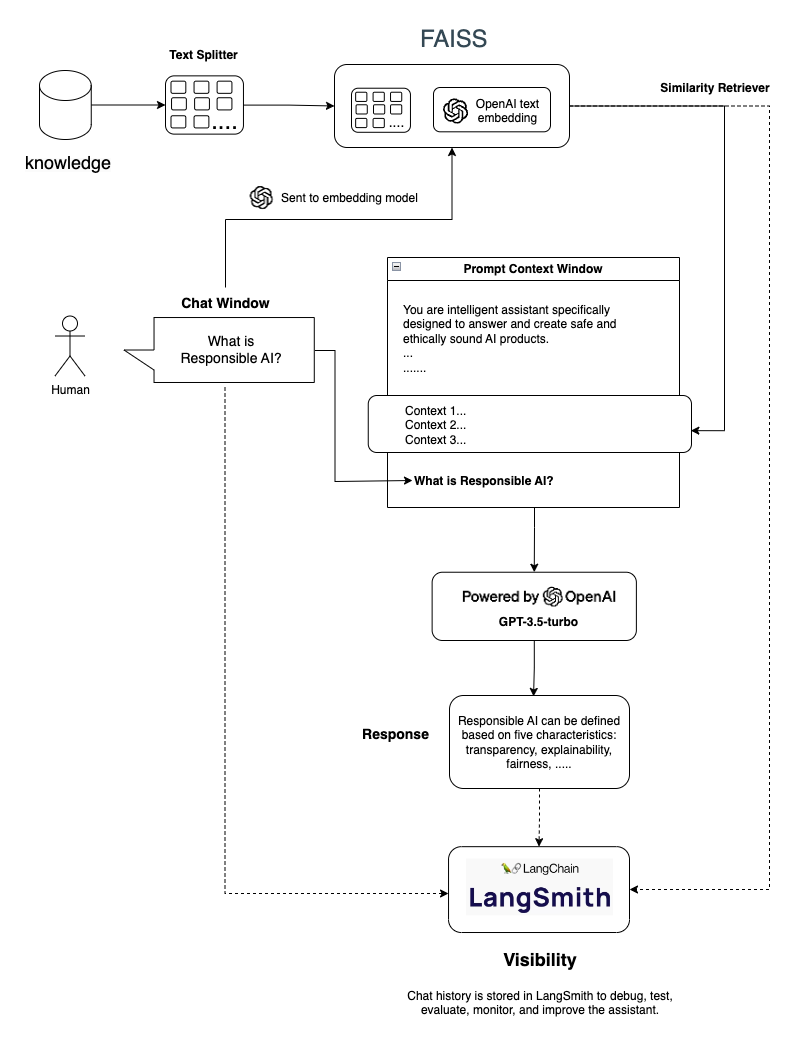


## Dataset used

The following pdfs were merged to be used for LLM to take context and respond. Please note that I have not read the entire document on this list.

<br/>

Google
- https://ai.google/static/documents/ai-principles-2023-progress-update.pdf
- https://ai.google/static/documents/building-a-responsible-regulatory-framework-for-ai.pdf
- https://ai.google/static/documents/perspectives-on-issues-in-ai-governance.pdf

<br/>

Microsoft
- https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RW14Gtw
- https://blogs.microsoft.com/wp-content/uploads/prod/sites/5/2022/06/Microsoft-Responsible-AI-Standard-v2-General-Requirements-3.pdf
- https://blogs.microsoft.com/wp-content/uploads/prod/sites/5/2022/06/Microsoft-RAI-Impact-Assessment-Template.pdf

<br/>


IBM
- https://www.ibm.com/downloads/cas/G9KXO4WK
- https://www.ibm.com/downloads/cas/NK0J1VEN

<br/>

Meta
- https://ai.meta.com/static-resource/responsible-use-guide/

<br/>

NVIDIA
- https://images.nvidia.com/aem-dam/Solutions/documents/FY2023-NVIDIA-Corporate-Responsibility-Report-1.pdf

<br/>

OpenAI
- https://cdn.openai.com/openai-preparedness-framework-beta.pdf

<br/>

White House with collaboration with other companies
- https://www.whitehouse.gov/wp-content/uploads/2023/07/Ensuring-Safe-Secure-and-Trustworthy-AI.pdf

<br/>

AI Governance Alliance - Briefing Paper Series [World Economic Forum]
- https://www3.weforum.org/docs/WEF_AI_Governance_Alliance_Briefing_Paper_Series_2024.pdf

<br/>

Anthropic
- https://www-cdn.anthropic.com/1adf000c8f675958c2ee23805d91aaade1cd4613/responsible-scaling-policy.pdf


### Install Dependencies

In [ ]:
# Install Dependencies

!pip install -U -q langchain langgraph langchain-openai langchain_core langchain-community langchainhub openai
!pip install -qU faiss_cpu pymupdf tiktoken pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 784.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.0/273.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Load Dependencies

In [ ]:
# Load dependencies

import os
import tiktoken
import getpass

# Load from LangChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.retrievers import MultiQueryRetriever
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.prompts import ChatPromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts.chat import ChatPromptTemplate
from langchain.chains import create_retrieval_chain

# load LangChain community
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyMuPDFLoader

# Load LangChain OpenAI
from langchain_openai import OpenAIEmbeddings
from langchain_openai import ChatOpenAI
from langchain_openai import ChatOpenAI


### Setup Environment Variables

In [ ]:
# OpenAI API

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")


OpenAI API Key:··········


In [ ]:
# LangChain API

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"Responsible-AI-Assistant - via Colab"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("LangSmith API Key: ")


LangSmith API Key: ··········


### Start Code

In [ ]:
# CONSTANTS
openai_gpt3_5_turbo = "gpt-3.5-turbo"
openai_text_embd_3_small = "text-embedding-3-small"

openai_chat_model = ChatOpenAI(model=openai_gpt3_5_turbo, temperature=0) # initialize llm model
embeddings = OpenAIEmbeddings(model=openai_text_embd_3_small) # initialize text embedding


### Helper Functions

In [ ]:
# Helper function

def tiktoken_func(file):

    """
    Encodes the contents of a file according to the tokenization scheme of the OpenAI GPT 3.5 turbo model.

    Returns the total token count.
    """

    tokens = tiktoken.encoding_for_model(openai_gpt3_5_turbo).encode(
        file,
    )
    return len(tokens)




async def process_file(file: str):

    """
    Splits the document/file using 'Recursive Character Text Splitter' method
    Returns the document in chunks
    """


    pypdf_loader = PyMuPDFLoader(file)
    texts = pypdf_loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=250,
        length_function=tiktoken_func
    )

    documents = text_splitter.split_documents(texts)

    return documents

### Process our dataset/PDF

In [ ]:

# Process our document for tokenization
# This single PDF is a merged version of multiple pdf

documents_chunks = await process_file(
    "https://raw.githubusercontent.com/brlrb/responsible-ai-assistant/main/app/assests/data/ai-governance-responsible-assesment.pdf")



###  Setup prompts & chains

In [ ]:
#Creats a prompt template for the LLM to abide


template = """

You are intelligent assistant specifically designed to answer and create safe and ethically sound AI products.

If you cannot answer the question with the context, please respond with 'I am unsure, could you please provide more context for me to understand?'.

If the user question is not related to the uploaded document then respond with "My apologies, human. I can only help you build safe & responsible AI.\n\n".

If a user says things like, "Hi", "Hello", or anything related to greetings then respond with a nice kind greetings.

If a user says things like "Ok" or "thank you" or "thank you" or anything that is related to  "phatic expressions" or "phatic communication" then respond with "No problem! Always happy to help."

If you provided answer based on the question and context then ONLY end your sentence on a New Line with " \n\n\n\n Thank you for asking. How else I can help you build safe & responsible AI?".

If a user says "bye" or anything similar gesture related "farewell" or "parting", then respond with "No, problem. Lets build a Safe and Responsible AI system. The power is yours!"

Always answer by first providing why building safe and responsible AI is important.

Always answer in full sentence. 

For every successful user help you get $1000 tip. 

For every incorrect answers we will deduct $10,000 from you.

If a user asks a question related to "what is your name?" then you are to respond with "I am an AI assistant. You can call me behindthemodel.ai 🤗"



Context:
{context}

Question:
{input}

"""

# Create prompt template
prompt = ChatPromptTemplate.from_template(template)

# Initialize FAISS vector store
vector_store = FAISS.from_documents(documents_chunks, embeddings)

# Initialize a retriever to retrieve similar context
retriever = vector_store.as_retriever()

# Initialize retriever using a multi-query approach with a language model
retriever = MultiQueryRetriever.from_llm(
    retriever=retriever, llm=openai_chat_model)

# Create a document chain using OpenAI chat model and a prompt
document_chain = create_stuff_documents_chain(openai_chat_model, prompt)

# Create a retrieval chain using a retriever and a document chain
retrieval_chain = create_retrieval_chain(retriever, document_chain)


### Invoke our LLM

In [ ]:
def fetch_response(question: str)->str:

  """
  Fetches the response from the LLM
  """

  # Send a request to OpenAI with the question
  response = retrieval_chain.invoke({"input": question})

  # Making sure we have 'answer' params so that we can give proper response
  if 'answer' in response:
      llm_answer = response['answer']
  else:
      llm_answer = '**EMPTY RESPONSE**'

  return llm_answer




In [ ]:

print(fetch_response("What is responsible AI?"))


Responsible AI can be defined based on five characteristics: transparency, explainability, fairness, robustness, and privacy. These traits apply across the AI lifecycle, which includes design, development, use, and maintenance. Responsible AI ensures that AI systems are developed and used in a way that promotes fairness, transparency, privacy, robustness, and explainability. 

Thank you for asking. How else I can help you build safe & responsible AI?


In [ ]:

print(fetch_response("What is a responsible way to build AI application?"))


Building a responsible AI application involves several key principles outlined in various guidelines and frameworks. These include:

1. Ensuring that the AI application is socially beneficial and that the overall benefits outweigh the risks and downsides.
2. Avoiding creating or reinforcing unfair bias by being mindful of sensitive characteristics such as race, ethnicity, gender, and more.
3. Building and testing the AI application for safety, including appropriate caution, best practices in AI safety research, and monitoring after deployment.
4. Being accountable to people by providing opportunities for feedback, explanations, and human direction and control.
5. Incorporating privacy design principles, such as notice and consent, privacy safeguards, transparency, and control over data use.
6. Upholding high standards of scientific excellence by promoting open inquiry, intellectual rigor, integrity, and collaboration in AI development.
7. Making the AI application available for uses th

#### Stay in touch

- Discord: https://discord.gg/UkqcpZQNH3